In [1]:
import tensorflow as tf

#Naver Sentiment Movie Corpus 다운
path_to_train_file = tf.keras.utils.get_file('train.txt', 'https://raw.githubusercontent.com/e9t/nsmc/master/ratings_train.txt')
path_to_test_file = tf.keras.utils.get_file('test.txt', 'https://raw.githubusercontent.com/e9t/nsmc/master/ratings_test.txt')


In [2]:
#데이터 로드 및 확인
train_text = open(path_to_train_file, 'rb').read().decode(encoding='utf-8')
test_text = open(path_to_test_file, 'rb').read().decode(encoding='utf-8')

# 텍스트가 총 몇 자인지 확인
print('Length of text: {} characters'.format(len(train_text)))
print('Length of text: {} characters'.format(len(test_text)))
print()

# 처음 300 자를 확인
print(train_text[:300])

Length of text: 6937271 characters
Length of text: 2318260 characters

id	document	label
9976970	아 더빙.. 진짜 짜증나네요 목소리	0
3819312	흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나	1
10265843	너무재밓었다그래서보는것을추천한다	0
9045019	교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정	0
6483659	사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 던스트가 너무나도 이뻐보였다	1
5403919	막 걸음마 뗀 3세부터 초등학교 1학년생인 8살용영화.ㅋㅋㅋ...별반개도 아까움.	0
7797314	원작의


In [3]:
import numpy as np

#학습을 위한 정답 데이터(train_Y) 만들기
train_Y = np.array([[int(row.split('\t')[2])] for row in train_text.split('\n')[1:] if row.count('\t') > 0])
test_Y = np.array([[int(row.split('\t')[2])] for row in test_text.split('\n')[1:] if row.count('\t') > 0])
print(train_Y.shape, test_Y.shape)
print(train_Y[:5])


(150000, 1) (50000, 1)
[[0]
 [1]
 [0]
 [0]
 [1]]


In [4]:
#train 데이터의 입력(X)에 대한 정제(Cleaning)
import re
# From https://github.com/yoonkim/CNN_sentence/blob/master/process_data.py
def clean_str(string):
    string = re.sub(r"[^가-힣A-Za-z0-9(),!?\'\`]", " ", string)
    string = re.sub(r"\'s", " \'s", string)
    string = re.sub(r"\'ve", " \'ve", string)
    string = re.sub(r"n\'t", " n\'t", string)
    string = re.sub(r"\'re", " \'re", string)
    string = re.sub(r"\'d", " \'d", string)
    string = re.sub(r"\'ll", " \'ll", string)
    string = re.sub(r",", " , ", string)
    string = re.sub(r"!", " ! ", string)
    string = re.sub(r"\(", " \( ", string)
    string = re.sub(r"\)", " \) ", string)
    string = re.sub(r"\?", " \? ", string)
    string = re.sub(r"\s{2,}", " ", string)
    string = re.sub(r"\'{2,}", "\'", string)
    string = re.sub(r"\'", "", string)
    return string.lower()

In [5]:
train_text_X = [row.split('\t')[1] for row in train_text.split('\n')[1:] if row.count('\t') > 0]
train_text_X = [clean_str(sentence) for sentence in train_text_X]
sentences = [sentence.split(' ') for sentence in train_text_X]

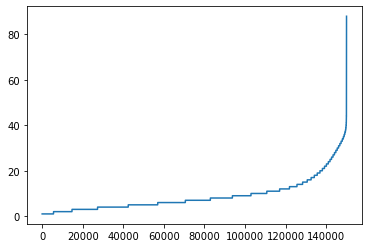

142587


In [6]:
#각 문장의 단어 길이 확인
import matplotlib.pyplot as plt

sentence_len = [len(sentence) for sentence in sentences]

sentence_len.sort()
plt.plot(sentence_len)
plt.show()
print(sum([int(l<=25) for l in sentence_len]))

In [7]:
# 단어 정제 및 문장 길이 줄임
sentences_new = []
for sentence in sentences:
    sentences_new.append([word[:5] for word in sentence][:25])
    sentences = sentences_new
for i in range(5):
    print(sentences[i])


['아', '더빙', '진짜', '짜증나네요', '목소리']
['흠', '포스터보고', '초딩영화줄', '오버연기조', '가볍지', '않구나']
['너무재밓었']
['교도소', '이야기구먼', '솔직히', '재미는', '없다', '평점', '조정']
['사이몬페그', '익살스런', '연기가', '돋보였던', '영화', '!', '스파이더맨', '늙어보이기', '했던', '커스틴', '던스트가', '너무나도', '이뻐보였다']


In [8]:
# Tokenizer와 pad_sequences를 사용한 문장 전처리
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from konlpy.tag import Mecab

vocab_size = 10000
embedding_dim = 16
max_length = 120
trunc_type = 'post'
oov_tok = '<oov>'

tokenizer = Tokenizer(num_words=vocab_size, oov_token = oov_tok)
tokenizer.fit_on_texts(sentences)
train_X = tokenizer.texts_to_sequences(sentences)
train_X = pad_sequences(train_X, padding='post',  maxlen=max_length, truncating=trunc_type)
print(train_X[:5])

[[  26  885    9 5796 1112    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0]
 [ 589 5797    1    1 6698    1    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0

In [9]:
# 감성 분석을 위한 모델 정의
model = tf.keras.Sequential([
                             tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
                             tf.keras.layers.Conv1D(128, 5, activation='relu'),
                             tf.keras.layers.GlobalAveragePooling1D(),
                             tf.keras.layers.Dense(64, activation='relu'),
                             tf.keras.layers.Dense(1, activation='sigmoid')

])

In [10]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 120, 16)           160000    
_________________________________________________________________
conv1d (Conv1D)              (None, 116, 128)          10368     
_________________________________________________________________
global_average_pooling1d (Gl (None, 128)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                8256      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 65        
Total params: 178,689
Trainable params: 178,689
Non-trainable params: 0
_________________________________________________________________


In [11]:
#감성 분석 모델 학습
history = model.fit(train_X, train_Y, epochs=3, batch_size=128, validation_split=0.2)

Epoch 1/3
938/938 [==============================] - 22s 23ms/step - loss: 0.4911 - accuracy: 0.7462 - val_loss: 0.4028 - val_accuracy: 0.8095
Epoch 2/3
938/938 [==============================] - 21s 23ms/step - loss: 0.3754 - accuracy: 0.8208 - val_loss: 0.3948 - val_accuracy: 0.8115
Epoch 3/3
938/938 [==============================] - 21s 23ms/step - loss: 0.3572 - accuracy: 0.8296 - val_loss: 0.3959 - val_accuracy: 0.8108


In [12]:
# 테스트 데이터 평가
test_text_X = [row.split('\t')[1] for row in test_text.split('\n')[1:] if row.count('\t') > 0]
test_text_X = [clean_str(sentence) for sentence in test_text_X]
sentences = [sentence.split(' ') for sentence in test_text_X]
sentences_new = []
for sentence in sentences:
    sentences_new.append([word[:5] for word in sentence][:25])
sentences = sentences_new
test_X = tokenizer.texts_to_sequences(sentences)
test_X = pad_sequences(test_X, padding='post')
model.evaluate(test_X, test_Y, verbose=0)

[0.6366502046585083, 0.8011999726295471]

In [13]:
test_text_X[:5]

['굳 ',
 'gdntopclassintheclub',
 '뭐야 이 평점들은 나쁘진 않지만 10점 짜리는 더더욱 아니잖아',
 '지루하지는 않은데 완전 막장임 돈주고 보기에는 ',
 '3d만 아니었어도 별 다섯 개 줬을텐데 왜 3d로 나와서 제 심기를 불편하게 하죠 \\? \\? ']